# Capstone 2

## Polish Bankruptcy

## Exploratory Data Analysis

In this step I will load the appropriate data files including the combined bankruptcy data, column dictionary and missing values dataframe. I will then begin to visualize the data with and without outliers and make the decision how to account for missing values and outliers. Then I will look at correlation between the features and visualize the distribution and explore relationships between correlation pairs.  Lastly i will create dataframes depicting the high, medium and low correlation pairs.

# Import Statements

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Load Data

In [2]:
#load combined data, column keys and missing value data

bankruptcy_data = pd.read_csv('bankruptcy_data_comb.csv')
data_columns = pd.read_csv('column_key.csv')
missing_percent = pd.read_csv('missing_val_perc.csv')

var_dict= [ data_columns['Variable']]
print(var_dict)

[0     X01
1     X02
2     X03
3     X04
4     X05
     ... 
60    X61
61    X62
62    X63
63    X64
64    X65
Name: Variable, Length: 65, dtype: object]


In [3]:
# check data loaded correctly

missing_percent.sort_values(by='count', ascending = False)

,Unnamed: 0,count,%
36,X37,18984,43.736897
20,X21,5854,13.486925
26,X27,2764,6.367930
59,X60,2152,4.957954
44,X45,2147,4.946435
...,...,...,...
56,X57,7,0.016127
58,X59,7,0.016127
54,X55,1,0.002304
64,Class,0,0.000000


In [4]:
# check data loaded correctly

bankruptcy_data.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Class,Year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,1


In [5]:
# check column dictionary loaded correctly

data_columns.head()

,Variable,Ratio
0,X01,net profit / total assets
1,X02,total liabilities / total assets
2,X03,working capital / total assets
3,X04,current assets / short-term liabilities
4,X05,[(cash + short-term securities + receivables -...


# Calculate bankruptcy percentage

In this step I am calculating the percentage of bankruptcies and displaying the information visually. 

In [6]:
# compute bankruptcy percentage

total_bk = bankruptcy_data['Class'].isin([1]).sum()
total_notbk = bankruptcy_data['Class'].isin([0]).sum()
percent_bk = (total_bk/(total_bk + total_notbk))*100
print("Percent of bankruptcies %",round(percent_bk,4))

Percent of bankruptcies % 4.8174


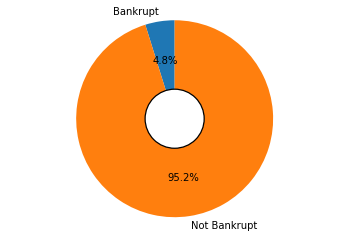

In [7]:
# create a donut plot of bankruptcy data

labels = 'Bankrupt', 'Not Bankrupt'
sizes = [percent_bk, (100-percent_bk)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, radius=3, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

centre_circle = plt.Circle((0,0),0.90,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

# Create boxplots of data with and without outliers

In this step I am displaying boxplots of the data with and without outliers and and creating an outlier dataframe.

In [8]:
# define function to create summary dataframe of outliers and display boxplots

def var_summary(bk_feature, outlier_df):
    
    #define function variables feature min,feature max,std,mean,median,zero entries and null entries
    feature_min = bankruptcy_data[[bk_feature]].idxmin()
    feature_max = bankruptcy_data[[bk_feature]].idxmax()
    feature_std = bankruptcy_data[[bk_feature]].std()
    feature_mean = bankruptcy_data[[bk_feature]].mean()
    feature_median = bankruptcy_data[[bk_feature]].median()
    number_zero = bankruptcy_data[[bk_feature]].isin([0]).sum()
    number_null = bankruptcy_data[[bk_feature]].isnull().sum()
    
    # calculate 3.0 times the interquartile range as outliers and sum
    Q1 = bankruptcy_data[[bk_feature]].quantile(0.25)
    Q3 = bankruptcy_data[[bk_feature]].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier = ((bankruptcy_data[[bk_feature]] < (Q1 - 3.0 * IQR)) | (bankruptcy_data[[bk_feature]] > (Q3 + 3.0 * IQR))).sum()
    
    # plot features with and without outliers
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.boxplot(ax=axes[0], data=bankruptcy_data, y=bk_feature, x= 'Class')
    sns.boxplot(ax=axes[1], data=bankruptcy_data, y= bk_feature, x= 'Class',sym="")
    
    # add rows to dataframe with summary information by feature
    df_new = {"Feature" :bk_feature, "Min": round(bankruptcy_data[bk_feature],4).min() , "Min position": feature_min[0] ,
              "Max": round(bankruptcy_data[bk_feature],4).max(), "Max position": feature_max[0], "STD": round(feature_std[0],4),
              "Mean": round(feature_mean[0],4), "Median": round(feature_median[0],4) ,"# of zero": number_zero[0], "# Null": number_null[0], 
              "Min Class": bankruptcy_data.loc[feature_min[0],'Class'], "Max Class": bankruptcy_data.loc[feature_max[0],
              "Class"], "# of Outliers": total_outlier[0]} 
    outlier_df = outlier_df.append(df_new, ignore_index = True)

    
    return outlier_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


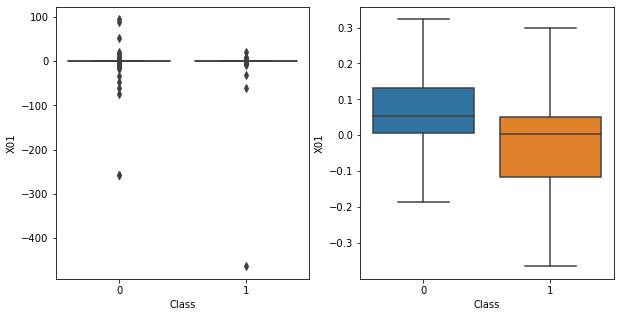

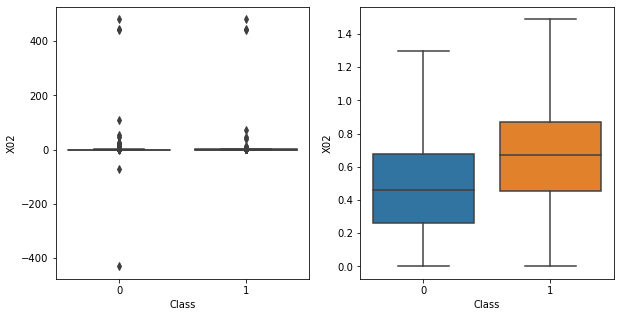

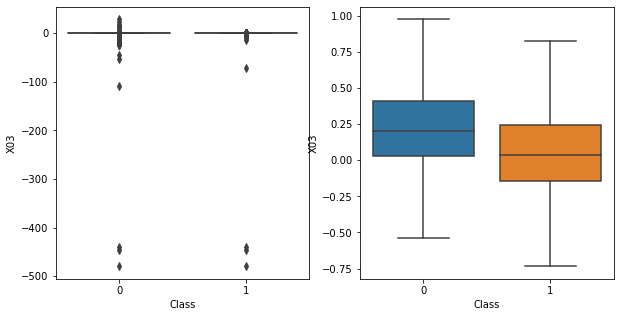

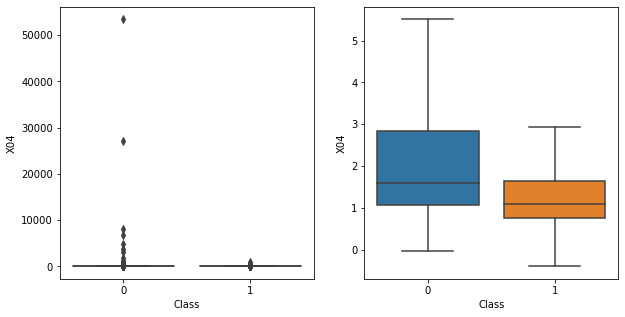

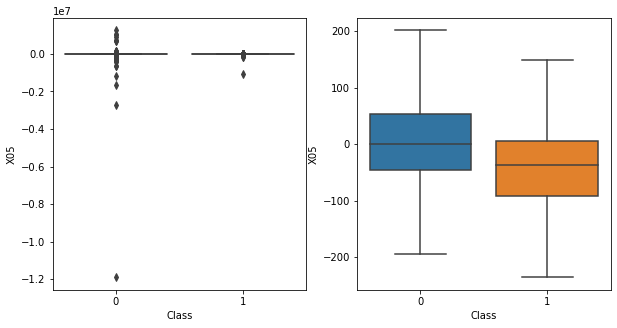

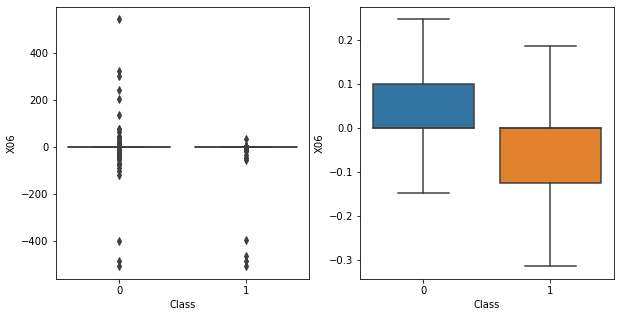

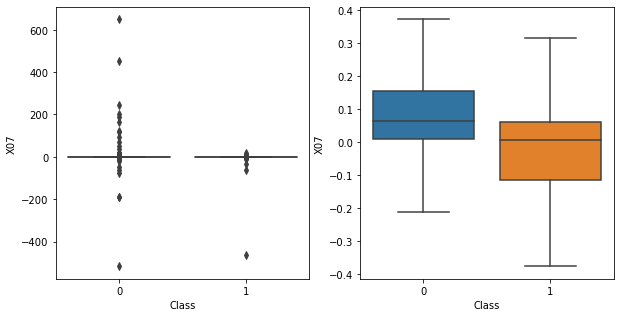

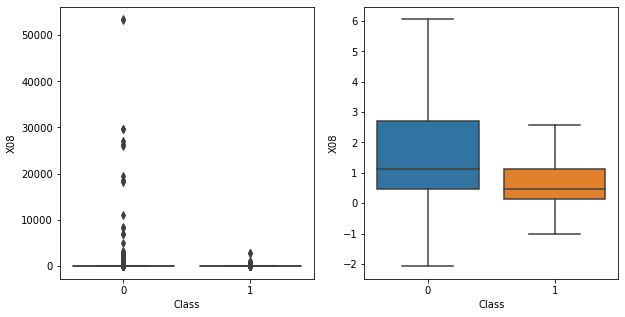

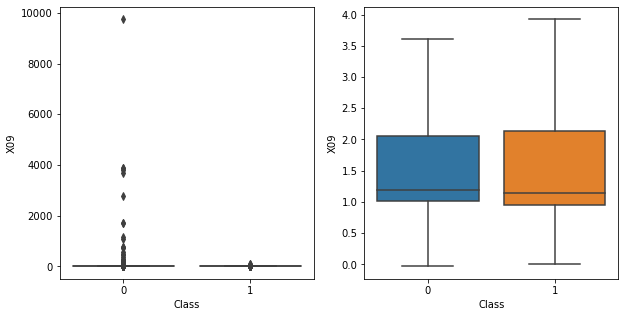

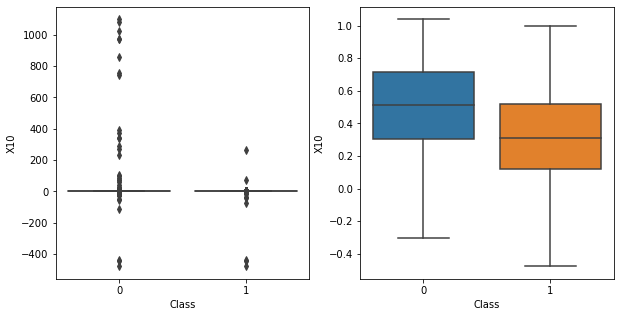

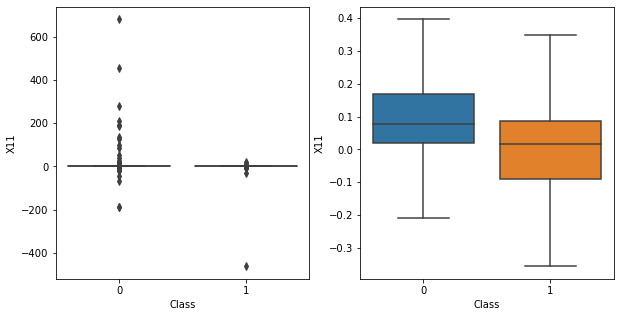

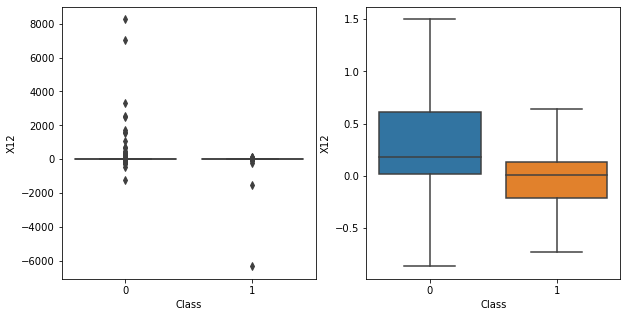

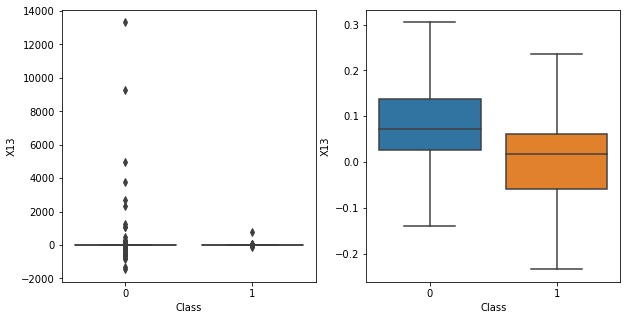

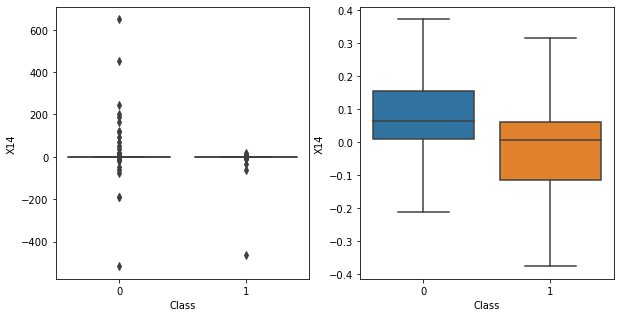

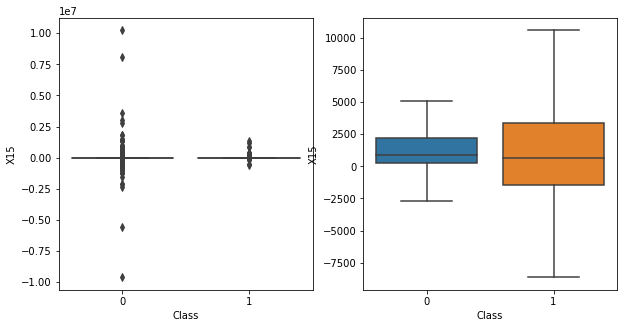

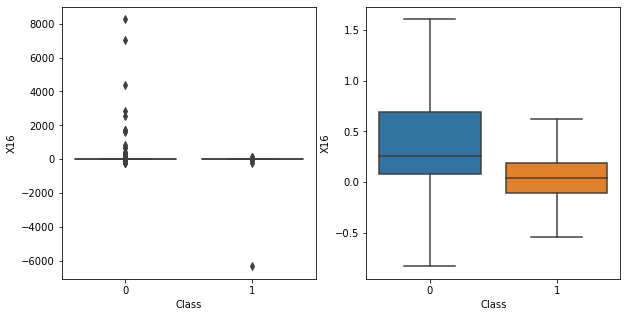

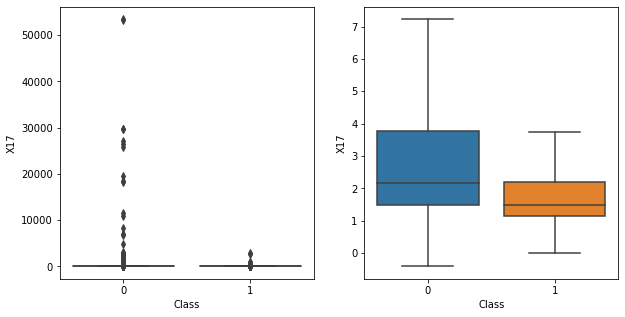

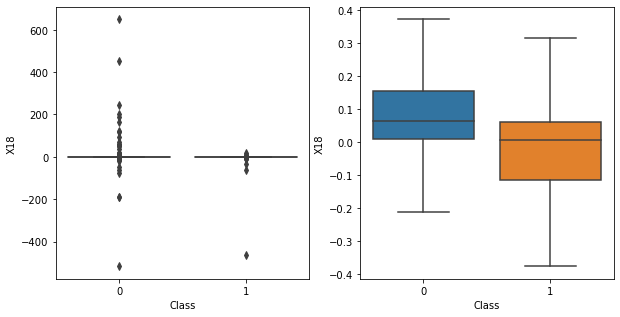

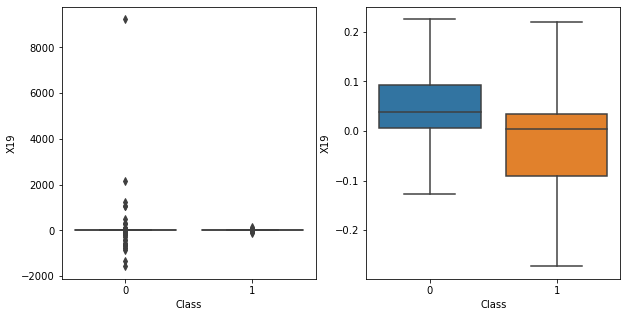

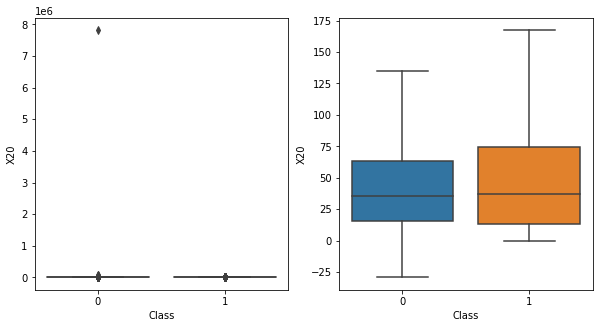

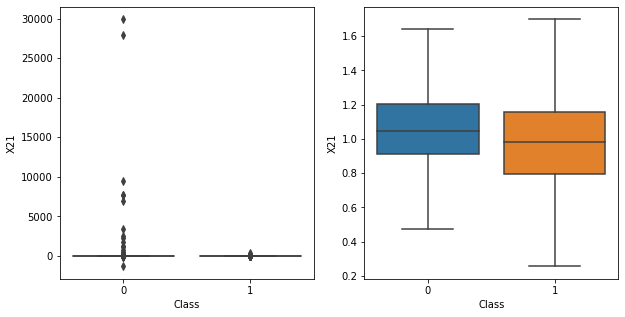

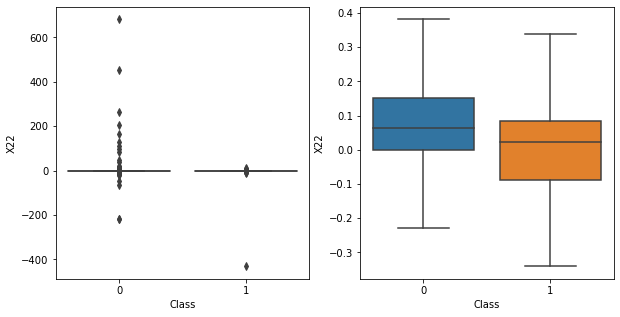

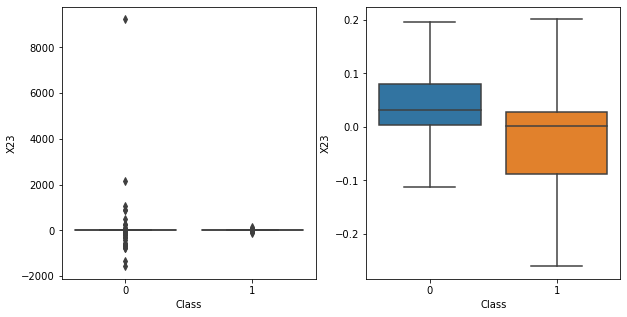

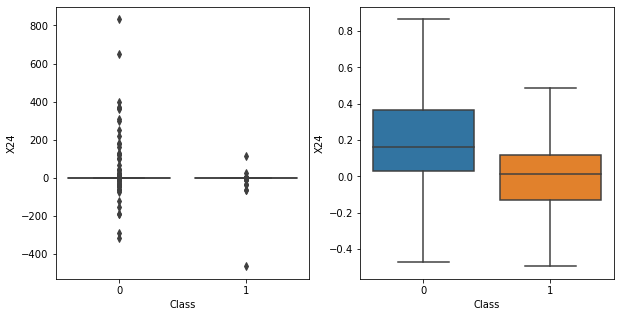

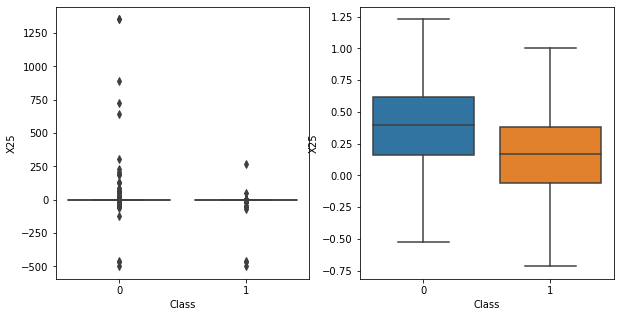

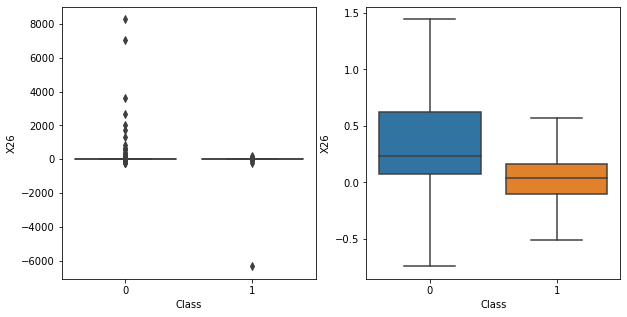

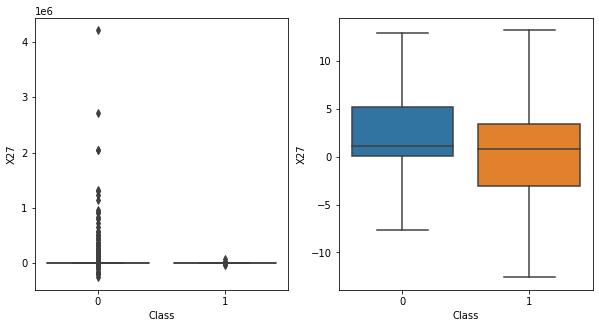

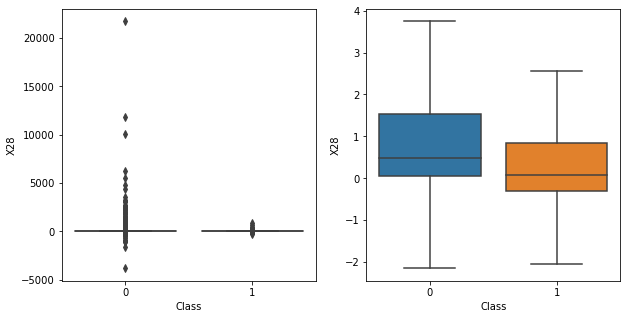

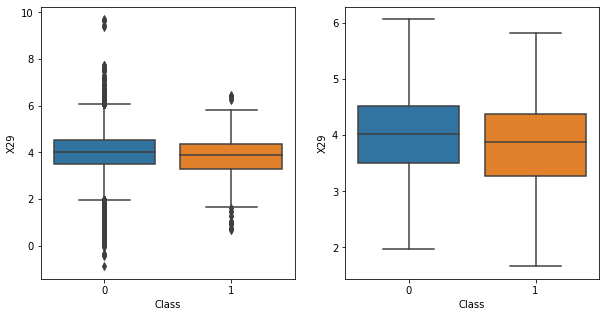

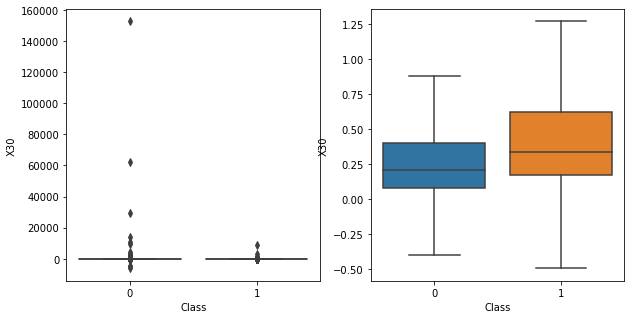

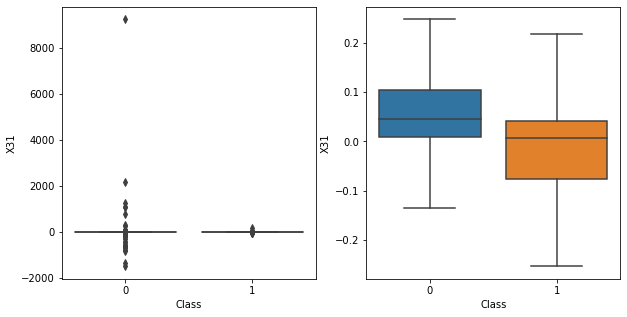

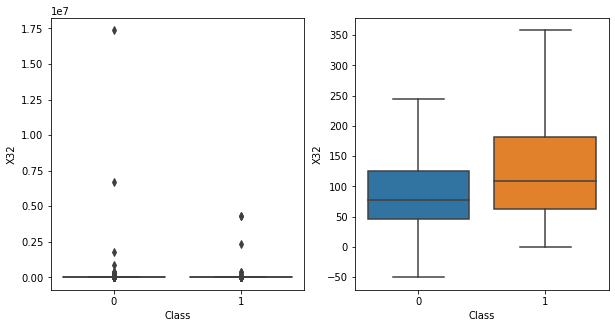

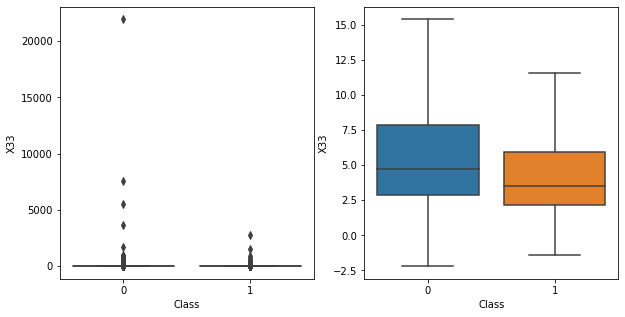

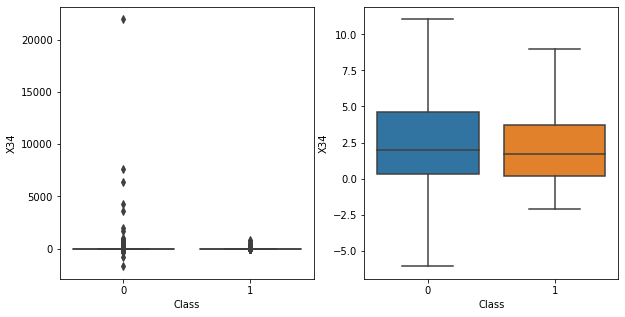

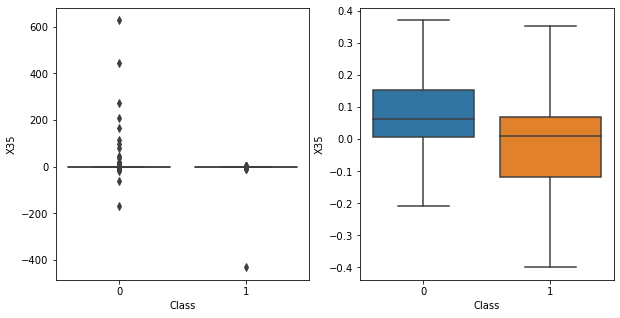

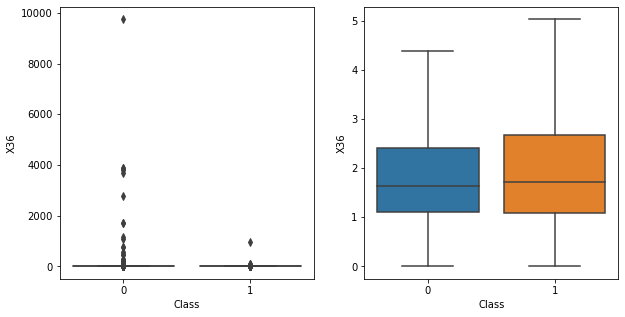

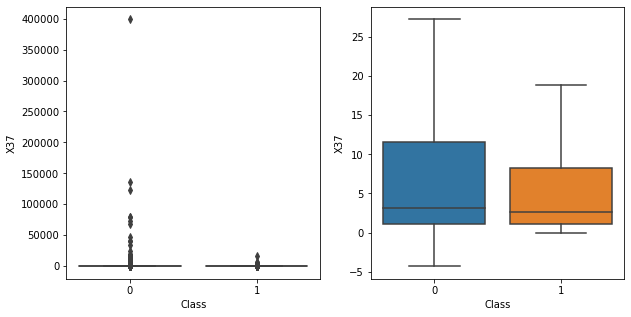

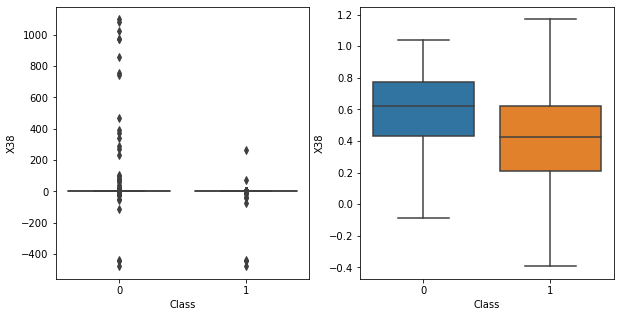

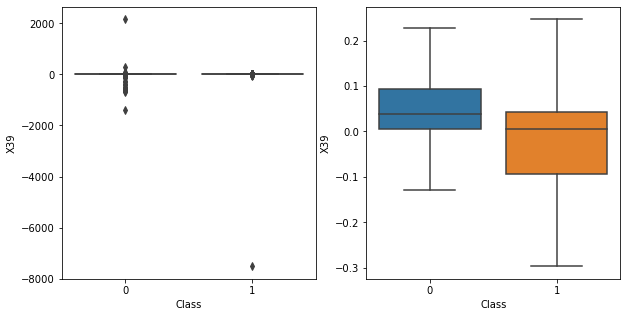

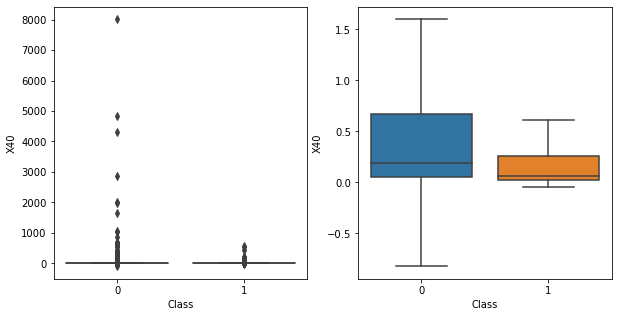

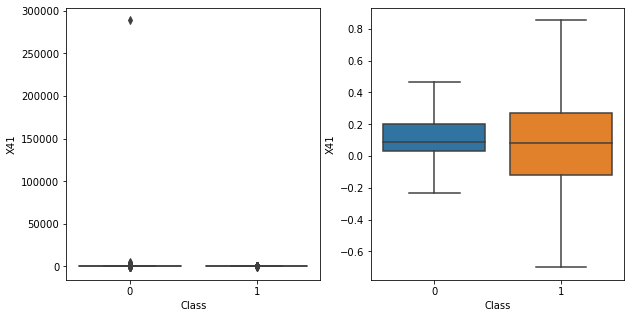

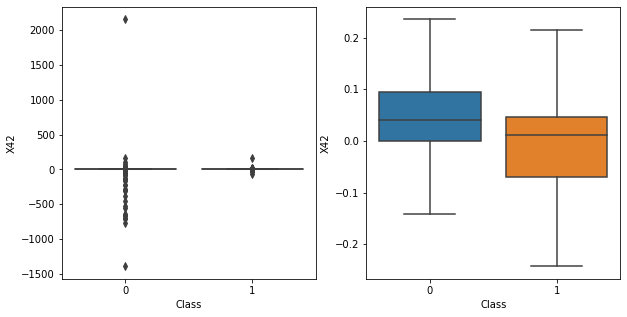

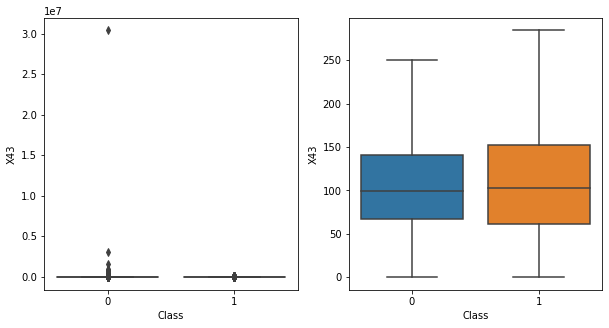

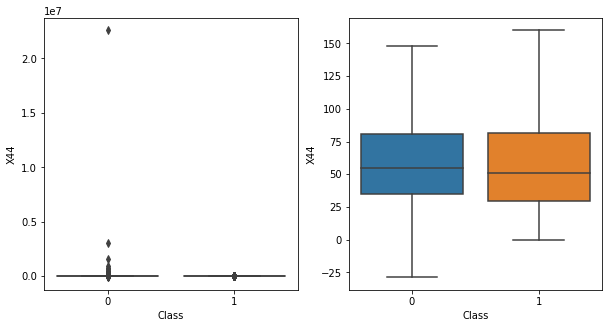

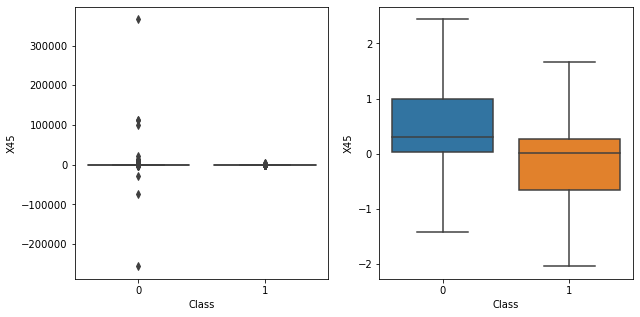

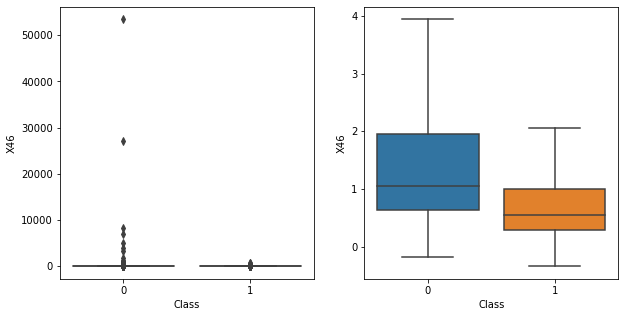

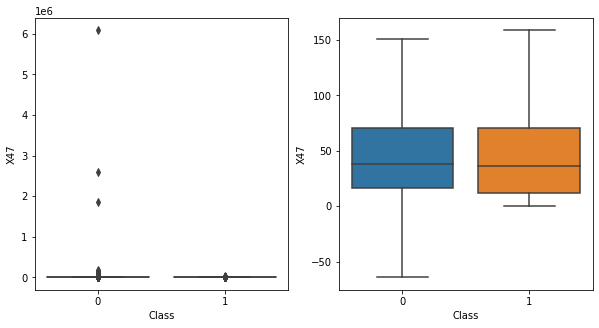

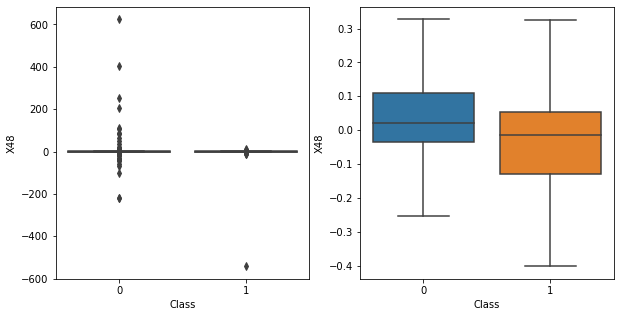

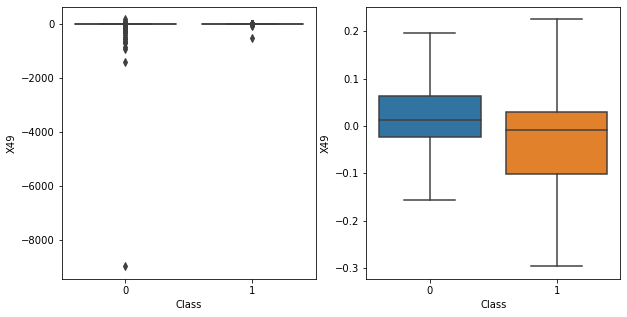

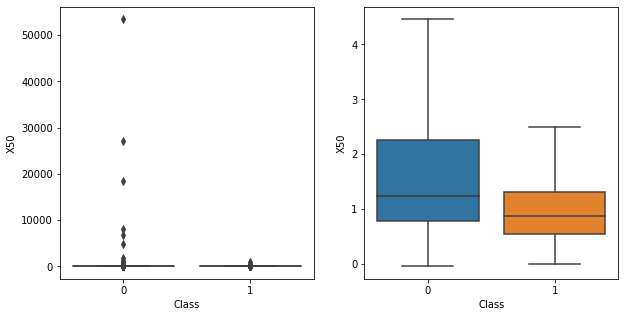

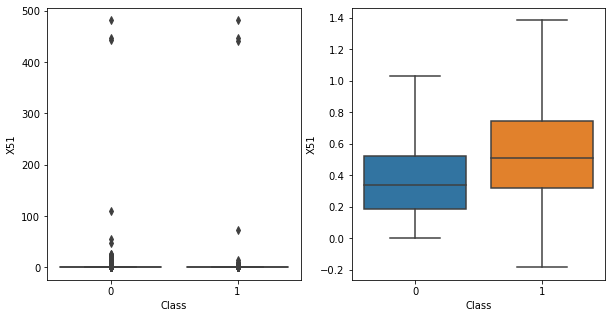

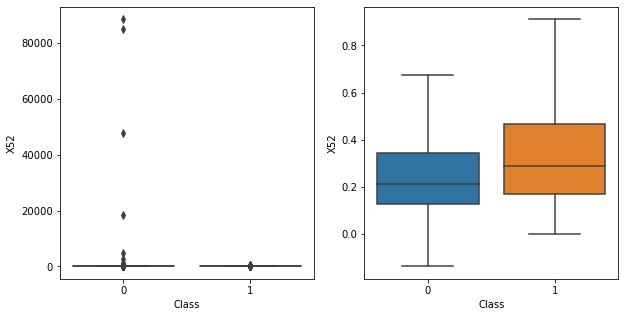

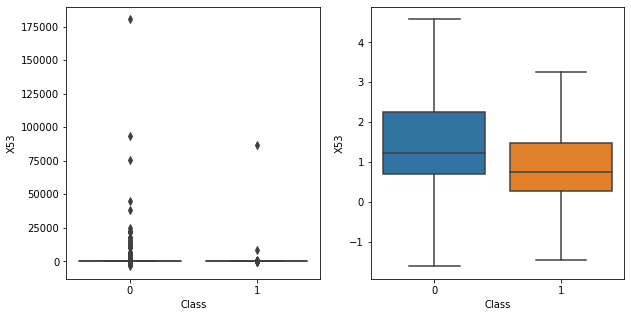

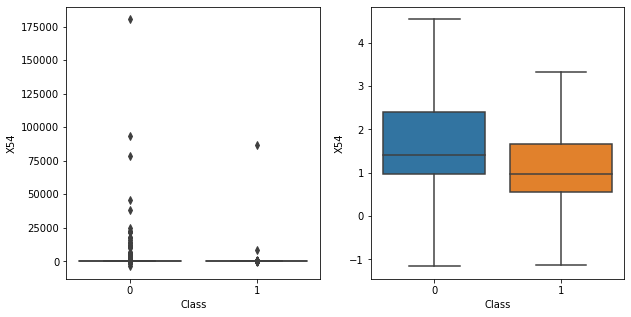

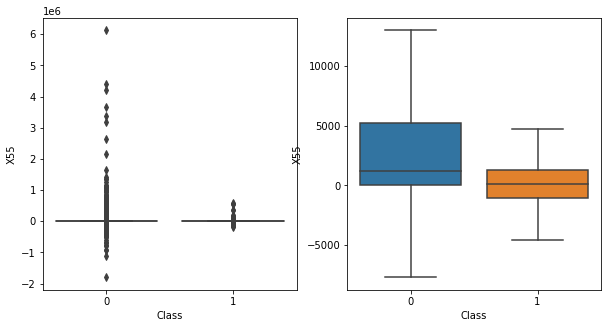

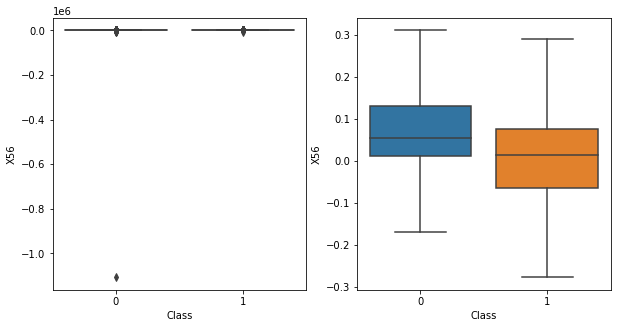

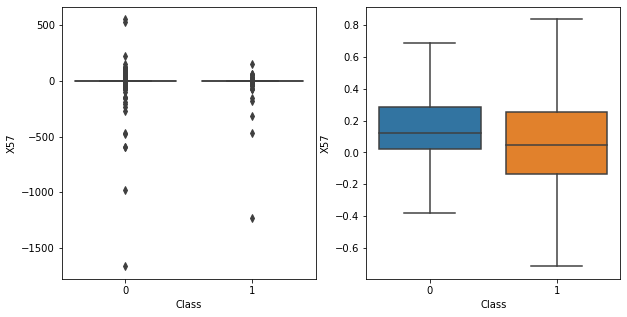

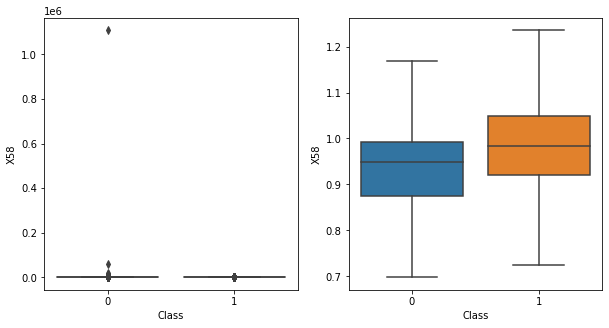

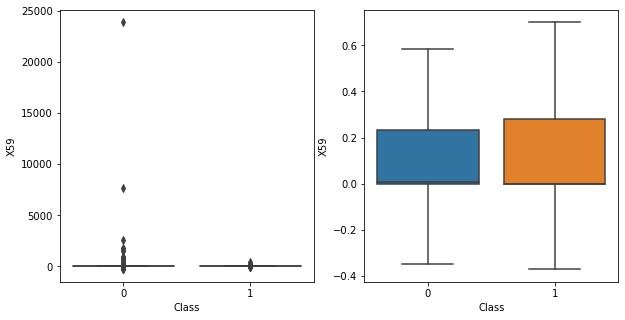

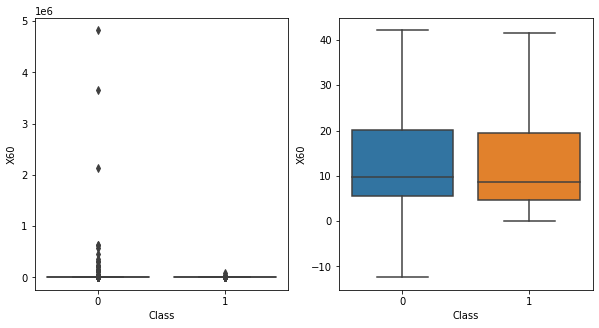

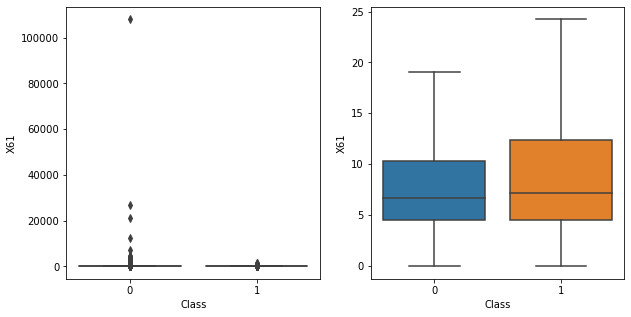

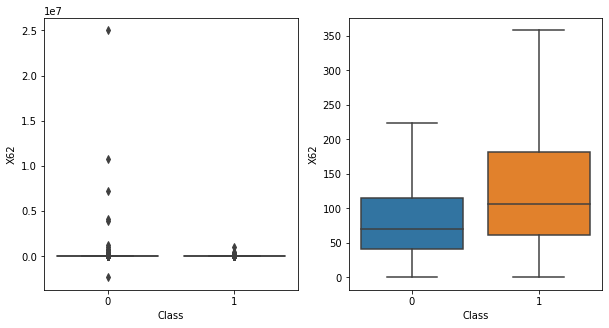

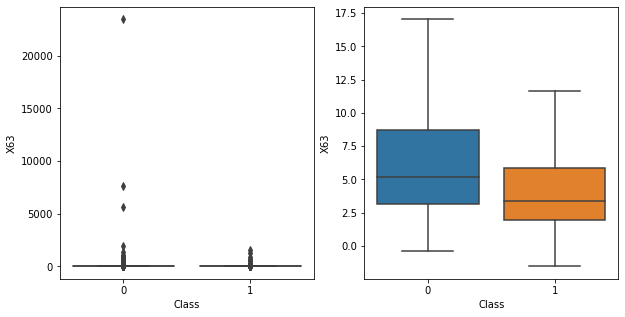

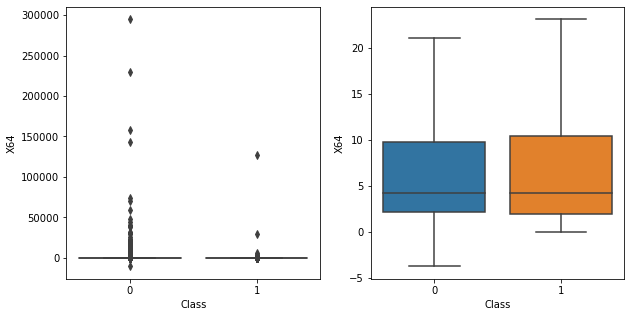

In [9]:
# define empty datframe
outlier_names = ["Feature" ,"Min", "Min position", "Max", "Max position", "STD", "Mean", "Median" ,"# of zero", "# Null",
                 "Min Class", "Max Class", "# of Outliers"]
outlier_df = pd.DataFrame(columns = outlier_names)

# call function for each feature
outlier_df = var_summary('X01', outlier_df)
outlier_df = var_summary('X02', outlier_df)
outlier_df = var_summary('X03', outlier_df)
outlier_df = var_summary('X04', outlier_df)
outlier_df = var_summary('X05', outlier_df)
outlier_df = var_summary('X06', outlier_df)
outlier_df = var_summary('X07', outlier_df)
outlier_df = var_summary('X08', outlier_df)
outlier_df = var_summary('X09', outlier_df)
outlier_df = var_summary('X10', outlier_df)
outlier_df = var_summary('X11', outlier_df)
outlier_df = var_summary('X12', outlier_df)
outlier_df = var_summary('X13', outlier_df)
outlier_df = var_summary('X14', outlier_df)
outlier_df = var_summary('X15', outlier_df)
outlier_df = var_summary('X16', outlier_df)
outlier_df = var_summary('X17', outlier_df)
outlier_df = var_summary('X18', outlier_df)
outlier_df = var_summary('X19', outlier_df)
outlier_df = var_summary('X20', outlier_df)
outlier_df = var_summary('X21', outlier_df)
outlier_df = var_summary('X22', outlier_df)
outlier_df = var_summary('X23', outlier_df)
outlier_df = var_summary('X24', outlier_df)
outlier_df = var_summary('X25', outlier_df)
outlier_df = var_summary('X26', outlier_df)
outlier_df = var_summary('X27', outlier_df)
outlier_df = var_summary('X28', outlier_df)
outlier_df = var_summary('X29', outlier_df)
outlier_df = var_summary('X30', outlier_df)
outlier_df = var_summary('X31', outlier_df)
outlier_df = var_summary('X32', outlier_df)
outlier_df = var_summary('X33', outlier_df)
outlier_df = var_summary('X34', outlier_df)
outlier_df = var_summary('X35', outlier_df)
outlier_df = var_summary('X36', outlier_df)
outlier_df = var_summary('X37', outlier_df)
outlier_df = var_summary('X38', outlier_df)
outlier_df = var_summary('X39', outlier_df)
outlier_df = var_summary('X40', outlier_df)
outlier_df = var_summary('X41', outlier_df)
outlier_df = var_summary('X42', outlier_df)
outlier_df = var_summary('X43', outlier_df)
outlier_df = var_summary('X44', outlier_df)
outlier_df = var_summary('X45', outlier_df)
outlier_df = var_summary('X46', outlier_df)
outlier_df = var_summary('X47', outlier_df)
outlier_df = var_summary('X48', outlier_df)
outlier_df = var_summary('X49', outlier_df)
outlier_df = var_summary('X50', outlier_df)
outlier_df = var_summary('X51', outlier_df)
outlier_df = var_summary('X52', outlier_df)
outlier_df = var_summary('X53', outlier_df)
outlier_df = var_summary('X54', outlier_df)
outlier_df = var_summary('X55', outlier_df)
outlier_df = var_summary('X56', outlier_df)
outlier_df = var_summary('X57', outlier_df)
outlier_df = var_summary('X58', outlier_df)
outlier_df = var_summary('X59', outlier_df)
outlier_df = var_summary('X60', outlier_df)
outlier_df = var_summary('X61', outlier_df)
outlier_df = var_summary('X62', outlier_df)
outlier_df = var_summary('X63', outlier_df)
outlier_df = var_summary('X64', outlier_df)

## Display Outlier Dataframe

Display of outlier dataframe with the database position of the minimum and maximum value and the value as well as summary statistics and the total of zero, and null outliers as well as the bankruptcy class of the minimum and maximum position.

In [10]:
# display outlier dataframe
outlier_df.head(32)

,Feature,Min,Min position,Max,Max position,STD,Mean,Median,# of zero,# Null,Min Class,Max Class,# of Outliers
0,X01,-4.638900e+02,43145,9.428000e+01,5787,2.9941,0.0352,0.0497,240,8,1,0,1622
1,X02,-4.308700e+02,41846,4.809600e+02,17051,5.8427,0.5902,0.4719,89,8,0,1,479
2,X03,-4.799600e+02,17051,2.833600e+01,38946,5.4394,0.1144,0.1966,24,8,1,0,375
3,X04,-4.031000e-01,43176,5.343300e+04,21370,295.4344,6.3147,1.5698,2,134,1,0,2540
4,X05,-1.190300e+07,25437,1.250100e+06,39799,61243.0259,-385.3466,-1.0345,43,89,0,0,3859
5,X06,-5.084100e+02,17051,5.432500e+02,41846,7.2013,-0.0561,0.0000,17938,8,1,0,6525
6,X07,-5.174800e+02,41846,6.492300e+02,12873,5.7131,0.0935,0.0596,38,8,0,0,1398
7,X08,-1.414100e+02,1411,5.343200e+04,21370,505.8943,12.6408,1.0704,3,94,0,0,2743
8,X09,-3.496000e+00,43339,9.742300e+03,12873,62.9327,2.6522,1.1954,124,9,1,0,1156
9,X10,-4.799100e+02,17051,1.099500e+03,5283,14.6706,0.6269,0.5060,4,8,1,0,530


In [11]:
# display outlier dataframe
outlier_df.tail(32)

,Feature,Min,Min position,Max,Max position,STD,Mean,Median,# of zero,# Null,Min Class,Max Class,# of Outliers
32,X33,-1.919700e+01,8539,21944.00,12873,118.9912,8.6360,4.6255,294,134,0,0,1642
33,X34,-1.696000e+03,21370,21944.00,12873,120.9751,5.4114,1.9674,294,94,0,0,1535
34,X35,-4.315900e+02,43145,626.92,12873,4.7834,0.1119,0.0607,218,8,1,0,1313
35,X36,-9.000000e-04,11078,9742.30,12873,62.9843,2.9112,1.6434,76,8,0,0,820
36,X37,-5.255200e+02,2434,398920.00,4159,3058.4298,105.0854,3.0963,13,18984,0,0,2919
37,X38,-4.799100e+02,17051,1099.50,5283,14.7493,0.7244,0.6122,3,8,1,0,525
38,X39,-7.522000e+03,37352,2156.50,4721,39.2564,-0.2891,0.0369,212,127,1,0,1966
39,X40,-1.012700e+02,238,8007.10,33847,56.0299,2.1474,0.1767,25,134,0,0,3427
40,X41,-1.234400e+03,15013,288770.00,22930,1398.8375,7.7178,0.0855,91,754,0,0,4342
41,X42,-1.395800e+03,15490,2156.80,4721,15.9910,-0.1425,0.0380,3987,127,0,0,1627


## View unique outliers

Display position of minimum and maximum values per feature and the number of times it is the maximum or minimum.

In [12]:
# show unique minimum positions and counts
outlier_df['Min position'].value_counts()

43145    6
17051    5
41846    4
30507    4
11580    3
37426    3
43176    3
24544    2
19693    2
238      2
41516    2
31575    2
1411     2
4721     2
4021     1
43339    1
2434     1
15490    1
21370    1
8763     1
11078    1
37352    1
12873    1
13553    1
39533    1
279      1
3349     1
20586    1
12974    1
15013    1
18334    1
28693    1
25437    1
31914    1
8539     1
31488    1
Name: Min position, dtype: int64

In [13]:
# display unique mazimum positions and counts
outlier_df['Max position'].value_counts()

12873    12
4721      9
21370     5
5283      3
24317     3
9474      3
1232      3
39724     2
8780      2
17051     2
19693     2
28673     1
41846     1
8091      1
39799     1
1814      1
33847     1
25820     1
38438     1
38946     1
34390     1
22930     1
5787      1
11023     1
36665     1
37768     1
25081     1
20035     1
4159      1
Name: Max position, dtype: int64

## Plot Correlation Heatmap


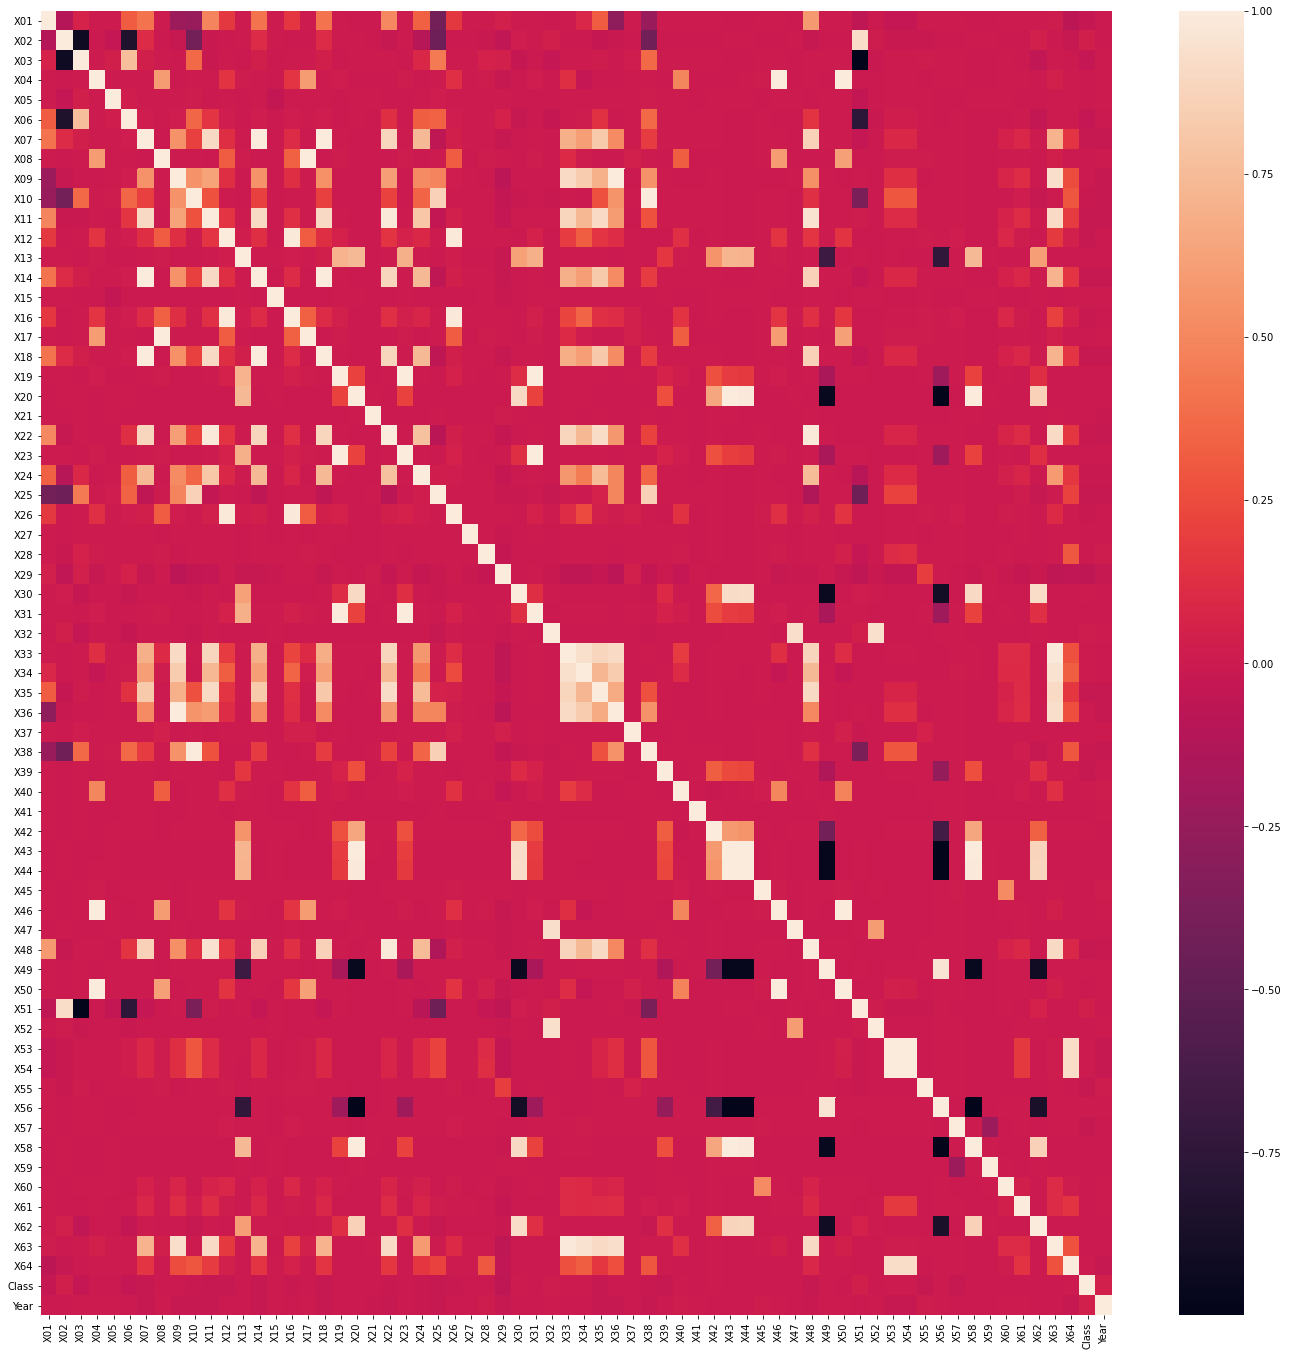

In [14]:
# plot heatmap of bankruptcy data correlation matrix
plt.subplots(figsize=(24,24))
sns.heatmap(bankruptcy_data.corr());

## Create Correlation Dataframe

In the next several steps I create a correlation data frame of the the absolute value of the correlation matrix, rename the columns and remove the duplicate correlations.  Then I separate the correlation dateframe into three dataframes with a low, medium and high correlation value.

In [15]:
# calculate the correlation matrix and reshape
df_corr = bankruptcy_data.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['Feature1', 'Feature2', 'Correlation']
df_corr = df_corr.sort_values(by=['Correlation'], ascending = False)

# create a mask to identify rows with duplicate features 
mask_dups1 = (df_corr[['Feature1', 'Feature2']].apply(frozenset, axis=1).duplicated()) | (df_corr['Feature1']==df_corr['Feature2']) 

# apply the mask to clean the correlation dataframe
df_corr = df_corr[~mask_dups1]

## Create High Mid and Low Correlation Dataframes

In [16]:
# low Correlation dataframe
dataCorrlow = (df_corr[df_corr['Correlation'] < 0.5])
dataCorrlow = dataCorrlow.reset_index(drop=True)

# mid range correlation dataframe
dataCorrmid = (df_corr[df_corr['Correlation'] > 0.5])
dataCorrmid = (dataCorrmid[dataCorrmid['Correlation'] < 0.7])
dataCorrmid = dataCorrmid.reset_index(drop=True)

# high correlation data frame
dataCorrhigh = (df_corr[df_corr['Correlation'] >= 0.7])
dataCorrhigh = dataCorrhigh.reset_index(drop=True)

In [17]:
# display high correlation dataframe
dataCorrhigh.head(55)

,Feature1,Feature2,Correlation
0,X07,X14,1.000000
1,X56,X58,0.999976
2,X04,X46,0.999920
3,X20,X58,0.999894
4,X20,X56,0.999880
5,X17,X08,0.999588
6,X23,X19,0.999290
7,X31,X19,0.999201
8,X44,X43,0.999132
9,X10,X38,0.998974


In [18]:
# display mid correlation dataframe
print(dataCorrhigh.info())
#dataCorrmid.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature1     111 non-null    object 
 1   Feature2     111 non-null    object 
 2   Correlation  111 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB
None


## Plot Seaborn pairplot of top high correlation data

In this step I display pairplots of the the top 8 high correlation pairs separated by class. 

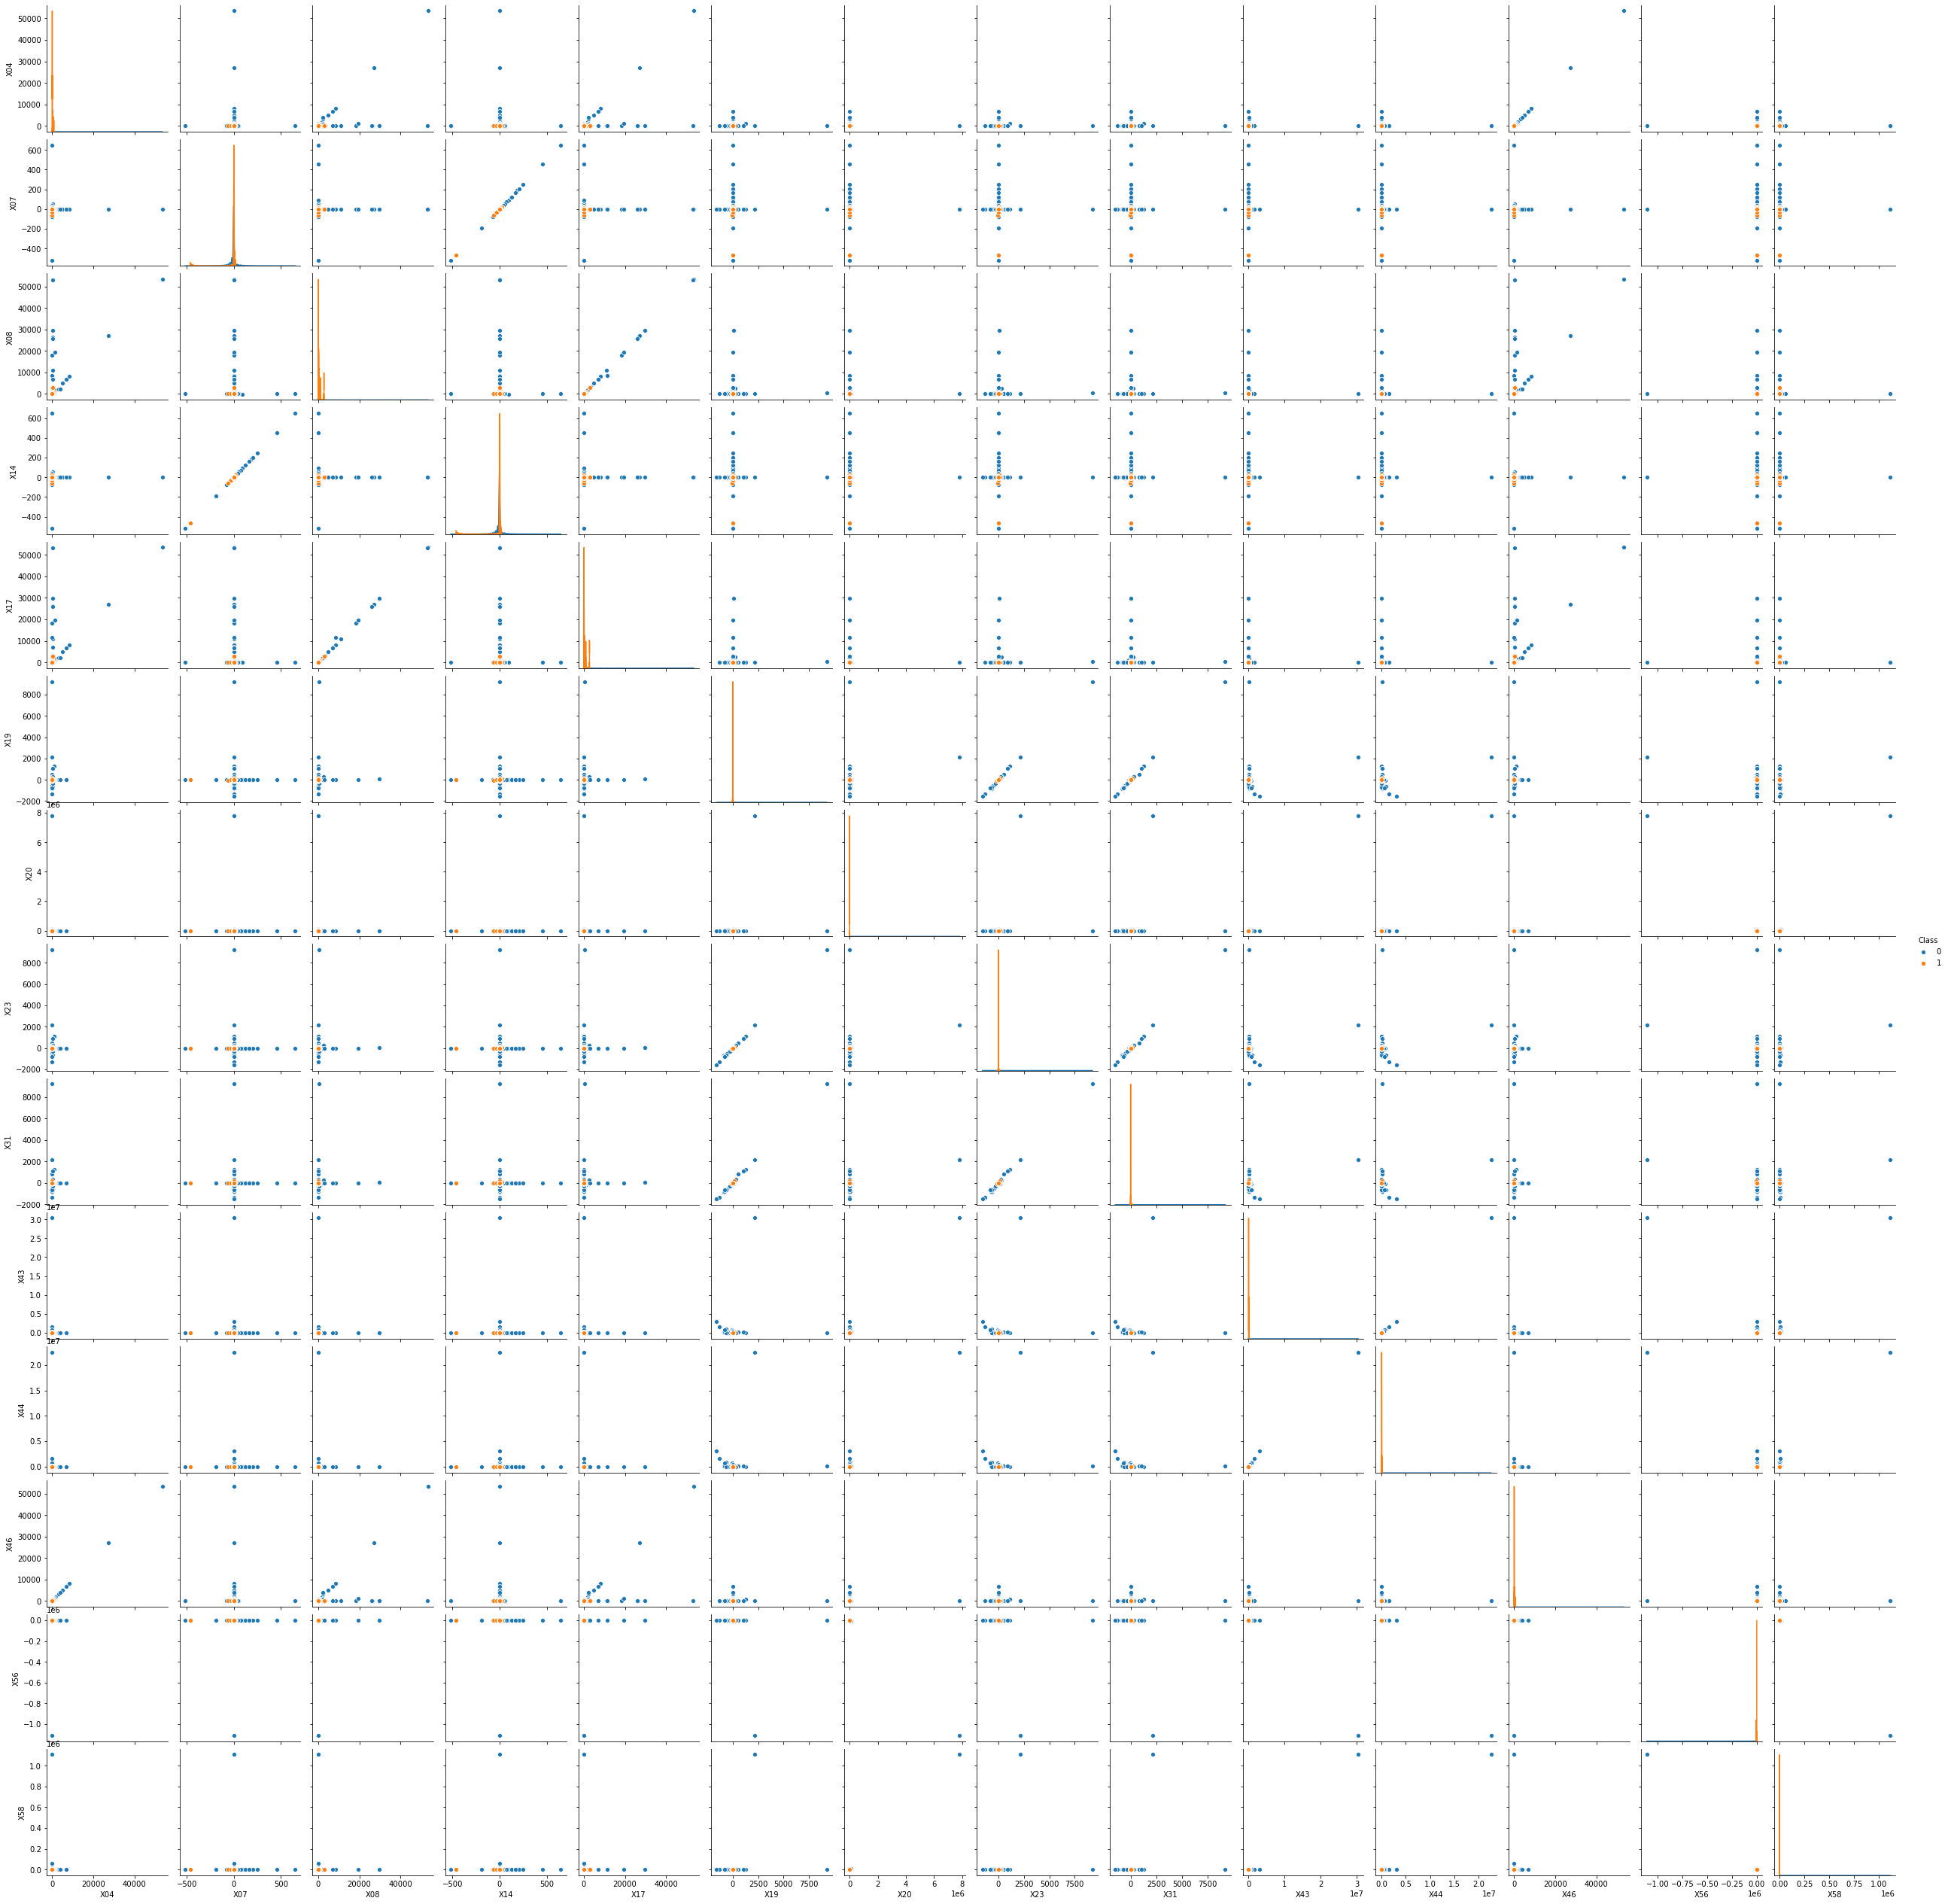

In [19]:
tophigh_corr= bankruptcy_data[['X04','X07','X08', 'X14','X17','X19', 'X20','X23','X31','X43' ,'X44','X46','X56','X58' , 'Class']].copy()
sns.pairplot(tophigh_corr, hue="Class")

## Overlapping histograms of top high correlation features

In this step I am plotting overlapping histograms and scaling the histogram to omit outliers.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


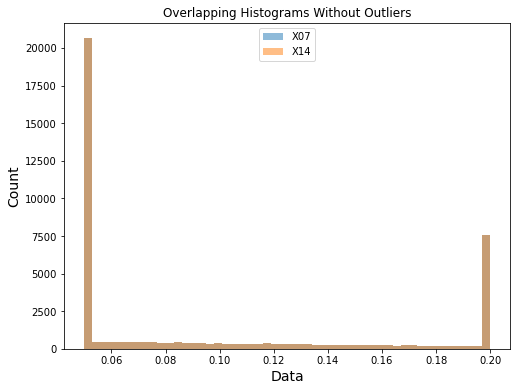

In [20]:
# Set the plot of X7 and X14
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X07'], .05, 0.2), bins=50, alpha=0.5, label="X07")
plt.hist(np.clip(bankruptcy_data['X14'], .05, 0.2), bins=50, alpha=0.5, label="X14")

# Create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper center')

The top correlation value of 1.0 is between X7 and X14.  Based on the plot the data is nearly identical and will be disregarded.  

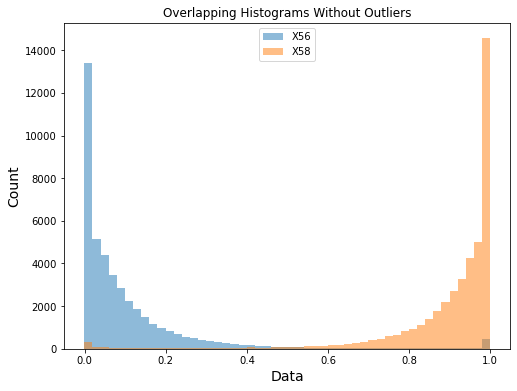

In [21]:
#Set the plot of X56 and X58
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X56'],-.001,1.0), bins=50, alpha=0.5, label="X56")
plt.hist(np.clip(bankruptcy_data['X58'], -.001, 1.0), bins=50, alpha=0.5, label="X58")

#Create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper center')

The data between X56 and X58 is inverse.

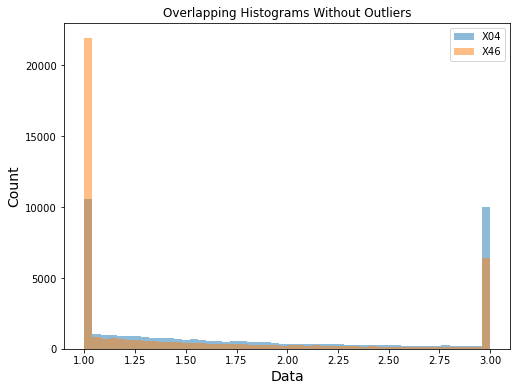

In [22]:
# set the plot between X4 and X46
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X04'], 1.0,3.0), bins=50, alpha=0.5, label="X04")
plt.hist(np.clip(bankruptcy_data['X46'], 1.0, 3.0), bins=50, alpha=0.5, label="X46")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

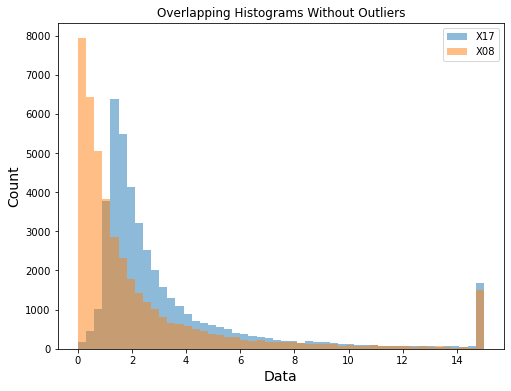

In [23]:
# set the plot between X17 and X8
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X17'], 0.0,15.0), bins=50, alpha=0.5, label="X17")
plt.hist(np.clip(bankruptcy_data['X08'], 0.0, 15.0), bins=50, alpha=0.5, label="X08")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

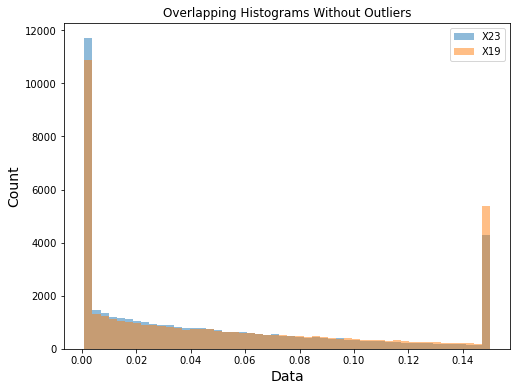

In [24]:
#set the plot between X23 and X19
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X23'], 0.001,0.15), bins=50, alpha=0.5, label="X23")
plt.hist(np.clip(bankruptcy_data['X19'], 0.001, 0.15), bins=50, alpha=0.5, label="X19")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

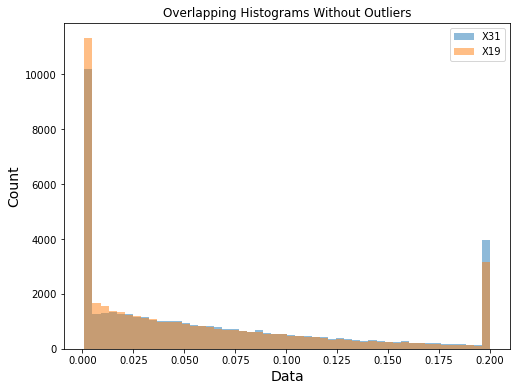

In [25]:
#set the plot between X31 and X19
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X31'], 0.001, .2), bins=50, alpha=0.5, label="X31")
plt.hist(np.clip(bankruptcy_data['X19'], 0.001, .2), bins=50, alpha=0.5, label="X19")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

The relationship between X23 and X19 and between X31 and X19 is inverse.

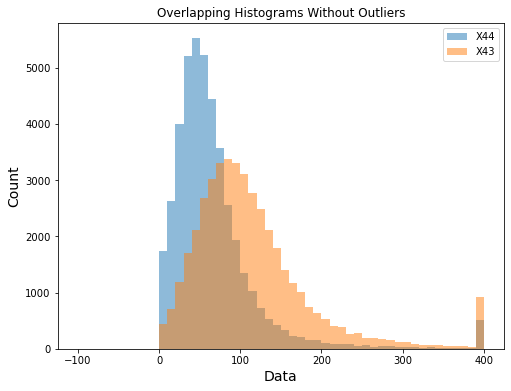

In [26]:
#set the plot between X44 and X43
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X44'], -100, 400), bins=50, alpha=0.5, label="X44")
plt.hist(np.clip(bankruptcy_data['X43'], -100, 400), bins=50, alpha=0.5, label="X43")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

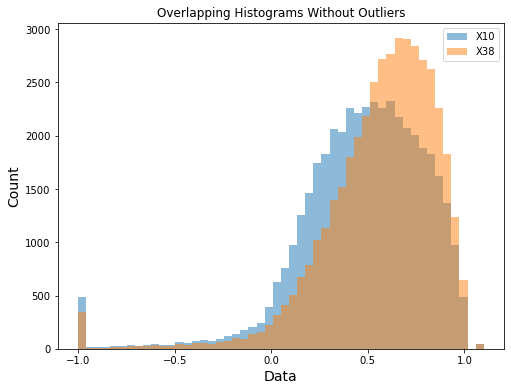

In [27]:
#set the plot between X10 and X38
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X10'], -1, 1.1), bins=50, alpha=0.5, label="X10")
plt.hist(np.clip(bankruptcy_data['X38'], -1, 1.1), bins=50, alpha=0.5, label="X38")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

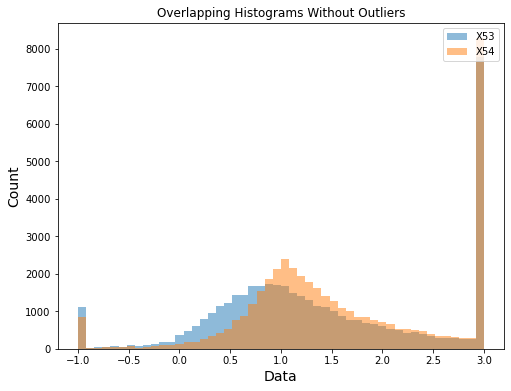

In [28]:
#set the plot between X53 and X54
plt.figure(figsize=(8,6))
plt.hist(np.clip(bankruptcy_data['X53'], -1, 3), bins=50, alpha=0.5, label="X53")
plt.hist(np.clip(bankruptcy_data['X54'], -1, 3), bins=50, alpha=0.5, label="X54")

# create the labels
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping Histograms Without Outliers")
plt.legend(loc='upper right')

## Save Data Files

In [29]:
# write 3 correlation matrix dataframes to file

dataCorrhigh.to_csv('dataCorrhigh.csv', index = False)
dataCorrmid.to_csv('dataCorrmid.csv', index = False)
dataCorrlow.to_csv('dataCorrlow.csv', index = False)

# save outlier dataframe to file
outlier_df.to_csv('outlier_df.csv', index = False)

## Summary


In the EDA step I created several visualizations of the bankruptcy data.  I viewed the percentage of bankruptcies in the dataset, displayed boxplots of the data with and without outliers, and created an dataframe of the summary information and outliers.  I then created a correlation matrix and heatmap and then divided the correlation data into three buckets of high medium and low correlation.  I then created pairplots and overlapping histograms of the top high correlation features separated by bankruptcy class.  In the next step I will decide how to process outliers and missing values and create initial models.